#### Multivariate Time Series RNN

Data : http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
##Import Data
df = pd.read_csv('/content/drive/MyDrive/Datasets/energydata_complete.csv', infer_datetime_format=True, index_col='date')

In [4]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

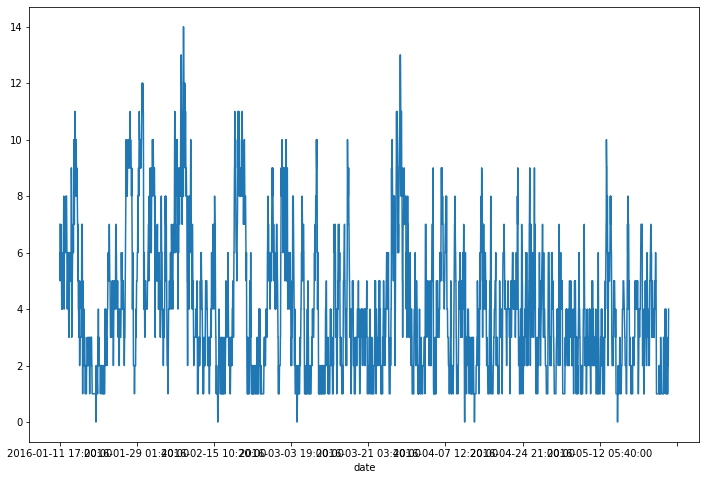

In [6]:
df['Windspeed'].plot(figsize=(12,8))

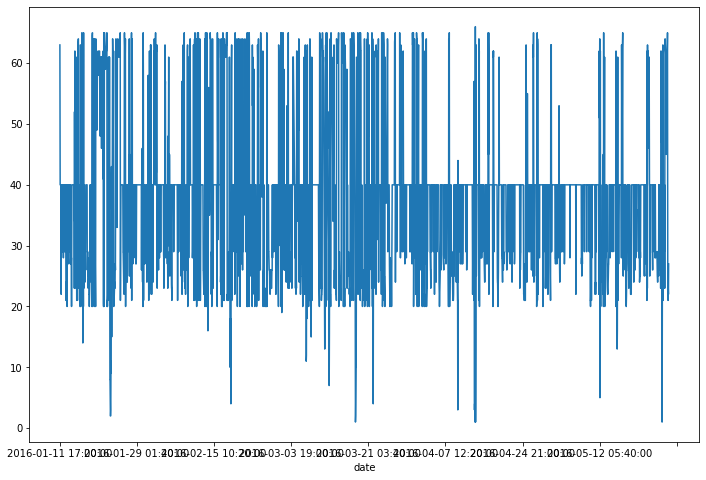

In [7]:
df['Visibility'].plot(figsize=(12,8))

In [8]:
len(df)

19735

In [9]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [11]:
#Getting information from '01-05-2016'
df = df.loc['2016-05-01':]

In [12]:
df = df.round(2)

In [13]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,19.5,47.29,4.80,40.06,19.5,31.6,22.2,40.00,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,19.5,47.29,4.80,40.09,19.5,31.6,22.2,40.40,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,19.5,47.26,4.66,40.03,19.5,31.6,22.2,41.00,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,19.5,47.26,4.53,41.30,19.5,31.6,22.2,41.33,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,19.5,47.20,4.59,41.83,19.5,31.6,22.2,41.63,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06


In [14]:
#Length of df
len(df)

3853

In [15]:
#Taking 2 days as test data
test_days = 2

In [16]:
#Multiplying it with 144
test_ind = test_days*144

In [17]:
test_ind

288

In [18]:
#Spliting train and test data
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [20]:
scaler = MinMaxScaler()

scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
train_scale = scaler.transform(train)

test_scale = scaler.transform(test)

In [22]:
###Time Series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 144
batch_size = 1
train_generator = TimeseriesGenerator(train_scale, train_scale, length = length, batch_size = batch_size)

In [24]:
X,y = train_generator[0]

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [26]:
X.shape

(1, 144, 28)

In [27]:
train.shape

(3565, 28)

In [28]:
test_gen = TimeseriesGenerator(test_scale, test_scale, length = length, batch_size = batch_size)

In [29]:
len(test_gen)

144

#### Modelling

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [32]:
model = Sequential()

model.add(LSTM(100, input_shape = (length, train_scale.shape[1])))

model.add(Dense(train_scale.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')

In [33]:
train_scale

array([[0.03896104, 0.        , 0.13798978, ..., 0.21301775, 0.30618371,
        0.30618371],
       [0.05194805, 0.        , 0.12947189, ..., 0.21420118, 0.22473484,
        0.22473484],
       [0.03896104, 0.        , 0.12606474, ..., 0.2147929 , 0.43626176,
        0.43626176],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [35]:
model.fit(train_generator, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = test_gen )

Epoch 1/50
3421/3421 [==============================] - 70s 19ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 2/50
3421/3421 [==============================] - 63s 18ms/step - loss: 0.0079 - val_loss: 0.0090
Epoch 3/50
3421/3421 [==============================] - 63s 19ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 4/50
3421/3421 [==============================] - 63s 19ms/step - loss: 0.0073 - val_loss: 0.0084
Epoch 5/50
3421/3421 [==============================] - 64s 19ms/step - loss: 0.0072 - val_loss: 0.0087
Epoch 6/50
3421/3421 [==============================] - 64s 19ms/step - loss: 0.0072 - val_loss: 0.0080
Epoch 7/50
3421/3421 [==============================] - 63s 19ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 8/50
3421/3421 [==============================] - 63s 19ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 9/50
3421/3421 [==============================] - 63s 18ms/step - loss: 0.0070 - val_loss: 0.0078
Epoch 10/50
3421/3421 [==============================] - 63s 18m

In [36]:
loss = pd.DataFrame(model.history.history)

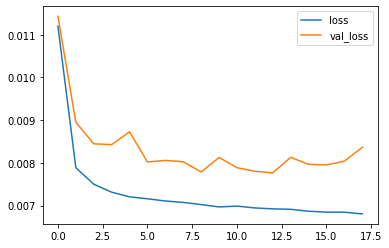

In [38]:
loss.plot()

#### Predictions

In [41]:
n_features = train_scale.shape[1]

test_predictions = []

first_eval_batch = train_scale[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [43]:
true_predictions = scaler.inverse_transform(test_predictions)

In [49]:
test_pred = pd.DataFrame(data = true_predictions, columns = df.columns, index = test.index)

In [50]:
test_pred

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,113.224099,0.810014,24.595965,37.050346,24.150325,34.774512,25.202786,36.997319,24.411374,37.525350,21.019040,50.695314,19.267885,1.906935,23.425615,34.331038,24.355095,38.545089,21.997042,37.111459,17.194346,756.516845,55.754522,1.645445,42.116305,7.683004,23.428545,23.715417
2016-05-25 18:20:00,108.095446,1.326395,24.666979,36.245803,24.190401,34.101622,25.312072,36.882151,24.458863,37.009282,20.908959,49.504581,18.894387,3.259451,23.481019,34.148714,24.287332,38.418955,21.958216,36.938831,17.327789,756.802778,54.594415,0.956181,42.842386,7.672143,24.611287,25.215727
2016-05-25 18:30:00,101.163235,1.149951,24.731697,35.420935,24.249076,33.428176,25.456078,36.761547,24.529598,36.541425,20.813789,48.967261,18.592590,4.606782,23.540755,33.908827,24.212054,38.329046,21.896217,36.808500,17.455175,757.057808,53.742815,0.156340,43.634735,7.548005,25.410389,26.318966
2016-05-25 18:40:00,98.717115,0.900332,24.794346,34.619112,24.316697,32.740393,25.599553,36.603004,24.607050,36.075215,20.697377,48.242851,18.552207,5.493045,23.568477,33.531006,24.135661,38.233705,21.804302,36.710928,17.716859,757.310993,52.423922,-0.665328,45.017697,7.363793,24.426790,25.322298
2016-05-25 18:50:00,99.419209,0.925586,24.884623,33.858004,24.455994,32.034562,25.750748,36.364928,24.700524,35.626403,20.551106,47.408141,18.727005,6.011845,23.567211,33.132906,24.035962,38.216490,21.719469,36.662108,18.095745,757.635293,50.517824,-1.439613,46.303222,7.181251,24.436731,25.240096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,66.395810,-3.241554,31.584897,19.796302,28.930777,26.518516,27.295655,52.944629,25.434612,55.643256,18.357447,100.026654,49.692509,6.216870,21.830612,16.958406,24.921839,32.764407,21.699725,55.552711,48.313560,752.391820,-61.826900,0.155127,31.854659,-15.515294,28.633580,28.205006
2016-05-27 17:30:00,65.634735,-3.293138,31.622873,19.598102,28.929981,26.384691,27.293529,52.930568,25.406707,55.679335,18.322496,99.858934,49.838442,6.193578,21.817640,16.785297,24.925603,32.648896,21.721652,55.580271,48.545180,752.428800,-62.397547,0.101615,31.967713,-15.709937,28.650525,28.174793
2016-05-27 17:40:00,64.021322,-3.343205,31.665335,19.398178,28.933864,26.274929,27.289317,52.953096,25.384125,55.748030,18.285024,99.863121,49.972139,6.173325,21.798791,16.625115,24.929691,32.549136,21.742839,55.631289,48.778342,752.461992,-63.001063,0.049092,32.043709,-15.918807,28.694552,28.160627


In [47]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,21.20,51.37,19.32,1.00,23.29,34.70,24.39,39.13,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,21.29,51.14,19.39,1.00,23.32,34.76,24.41,39.62,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,21.32,50.73,19.43,1.00,23.36,34.94,24.50,40.34,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,21.39,50.35,19.36,1.00,23.39,35.00,24.55,40.54,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,21.39,50.35,19.25,1.66,23.39,35.05,24.54,40.59,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,23.20,52.40,24.80,1.00,24.50,44.50,24.70,50.07,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,23.23,52.33,24.20,1.00,24.56,44.41,24.70,49.79,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,23.23,52.27,23.63,1.00,24.54,44.40,24.70,49.66,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


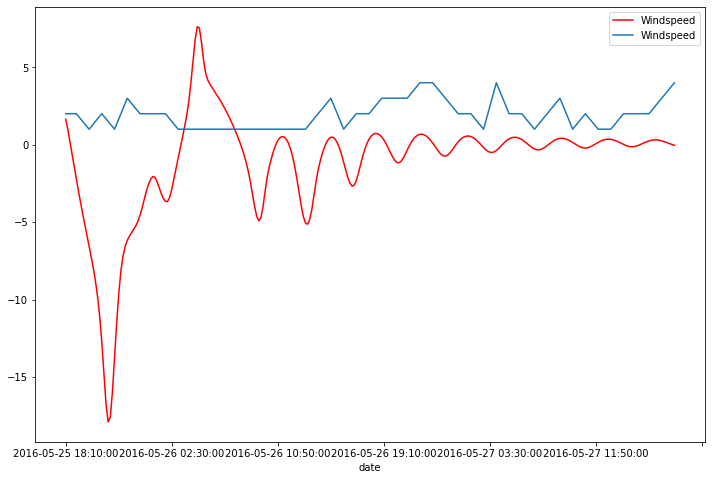

In [57]:

test_pred['Windspeed'].plot(figsize=(12,8),color='r')
test['Windspeed'].plot()
plt.legend()